<a href="https://colab.research.google.com/github/RPAlbuquerque/Stoicism-Related-Tweets-Key-Findings-and-Insights/blob/main/v3_Stoicism_in_Social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##🔹 Block 1 — Filtering Tweets with Stoicism-Related Keywords (/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v2/filtered_tweets_by_year/)

In [ ]:
##🔹 Block 2 — Semantic Sampling & Term Frequency Analysis (Years 2011–2023)

In [ ]:
import os
import pandas as pd

# Caminho onde estão os arquivos da v2
folder = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v2/filtered_tweets_by_year/"

# Listar arquivos .csv.gz
files = sorted([f for f in os.listdir(folder) if f.endswith(".csv.gz")])

print(f"📁 Found {len(files)} files:\n")

for file in files:
    file_path = os.path.join(folder, file)
    print(f"🔍 {file} — ", end='')

    try:
        # Tenta ler apenas as 3 primeiras linhas para testar
        df = pd.read_csv(file_path, nrows=3)
        print(f"{df.shape[0]} rows × {df.shape[1]} cols")
        print(f"🧩 Columns: {list(df.columns)}\n")
    except Exception as e:
        print(f"[ERROR] Could not read file: {e}\n")

📁 Found 14 files:

🔍 filtered_tweets_2010.csv.gz — [ERROR] Could not read file: No columns to parse from file

🔍 filtered_tweets_2011.csv.gz — 3 rows × 25 cols
🧩 Columns: ['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place', 'geom', 'retweets', 'tweet_favorites', 'photo_url', 'quoted_status_id', 'user_id', 'user_name', 'user_location', 'followers', 'friends', 'user_favorites', 'status', 'user_lang', 'latitude', 'longitude', 'data_source', 'GPS', 'spatialerror']

🔍 filtered_tweets_2012.csv.gz — 3 rows × 25 cols
🧩 Columns: ['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place', 'geom', 'retweets', 'tweet_favorites', 'photo_url', 'quoted_status_id', 'user_id', 'user_name', 'user_location', 'followers', 'friends', 'user_favorites', 'status', 'user_lang', 'latitude', 'longitude', 'data_source', 'GPS', 'spatialerror']

🔍 filtered_tweets_2013.csv.gz — 3 rows × 25 cols
🧩 Columns: ['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place', 'geom', '

In [ ]:
import os
import re
import pandas as pd
from collections import Counter
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v2/filtered_tweets_by_year/"
OUTPUT_SAMPLE = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/sample_semantic_validation.csv"
OUTPUT_TERMS = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/keyword_frequencies.csv"

YEARS = list(range(2011, 2024))  # Ignora 2010
SAMPLE_SIZE_PER_YEAR = 50

keywords = [
    "altrui", "aristot", "cosmop", "epictet", "epicur", "eudaimon", "hedon", "philosoph",
    "plato", "pythago", "socrat", "stioc", "stoic", "amorfati", "aurelius", "chrysippus",
    "cicero", "cleanthes", "commongood", "dichotomyofcontrol", "diogenes", "hadot",
    "humandignity", "humanworth", "jordanpeterson", "mattis", "mementomori",
    "moralinjury", "moralaction", "moralprogress", "moralpurpose", "musoniusrufus",
    "nussbaum", "peripatetic", "pigliucci", "ryanholiday", "seneca", "stockdale",
    "timferriss", "zeno"
]
regex = re.compile(r"\b(" + "|".join(keywords) + r")\w*\b", re.IGNORECASE)

# -------------------------------
# PROCESSING
# -------------------------------
samples = []
term_counter = Counter()

print("🔍 Starting semantic sampling...")
for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"filtered_tweets_{year}.csv.gz")
    if not os.path.exists(file_path):
        print(f"[⚠] File not found: {file_path}")
        continue
    if os.path.getsize(file_path) == 0:
        print(f"[⚠] Skipped {year} — file is empty.")
        continue

    try:
        df = pd.read_csv(file_path, sep=",", dtype=str, on_bad_lines='skip')
        if df.empty or "text" not in df.columns:
            print(f"[⚠] Skipped {year} — no valid rows or missing 'text' column.")
            continue

        df_sample = df.sample(n=min(SAMPLE_SIZE_PER_YEAR, len(df)), random_state=42)

        for _, row in df_sample.iterrows():
            text = row.get("text", "")
            found_terms = regex.findall(text)
            term_counter.update([t.lower() for t in found_terms])
            samples.append({
                "year": year,
                "text": text,
                "terms_detected": ", ".join(set(found_terms))
            })

    except Exception as e:
        print(f"[✖] Error reading {file_path}: {e}")
        continue

# -------------------------------
# SAVE OUTPUTS
# -------------------------------
print("💾 Saving semantic validation sample...")
pd.DataFrame(samples).to_csv(OUTPUT_SAMPLE, index=False)

print("📈 Saving keyword frequency table...")
pd.DataFrame(term_counter.most_common(), columns=["term", "count"]).to_csv(OUTPUT_TERMS, index=False)

print("✅ Block 2 complete — samples and term frequencies saved.")

🔍 Starting semantic sampling...


100%|██████████| 13/13 [03:36<00:00, 16.69s/it]

💾 Saving semantic validation sample...
📈 Saving keyword frequency table...
✅ Block 2 complete — samples and term frequencies saved.


In [ ]:
##🔹 Block 2B — Output Quality Check & Tweet Counts

In [ ]:
import os
import pandas as pd
from collections import Counter
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v2/filtered_tweets_by_year/"
YEARS = list(range(2011, 2024))  # Exclui 2010
SAMPLE_FILE = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/sample_semantic_validation.csv"

# -------------------------------
# 1. VISUAL CHECK: AMOSTRAS
# -------------------------------
print("🔍 Sample semantic validation preview:")
try:
    df_sample = pd.read_csv(SAMPLE_FILE)
    print(df_sample.head(10))
    unique_terms = df_sample["terms_detected"].str.split(",").explode().str.strip().value_counts()
    print("\n📊 Most common terms in sample:")
    print(unique_terms.head(10))
except Exception as e:
    print(f"[✖] Could not load sample file: {e}")

# -------------------------------
# 2. COUNT TOTAL VALID TWEETS
# -------------------------------
total_valid = 0
tweets_by_year = {}
tweets_by_country = Counter()

print("\n🔢 Counting total valid tweets and per year...")
for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"filtered_tweets_{year}.csv.gz")
    if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
        continue

    try:
        df = pd.read_csv(file_path, sep=",", dtype=str, on_bad_lines="skip")
        n = len(df)
        tweets_by_year[year] = n
        total_valid += n

        # Contagem por país simples (via 'place' ou 'user_location')
        if "place" in df.columns:
            tweets_by_country.update(df["place"].dropna().str.strip())
        elif "user_location" in df.columns:
            tweets_by_country.update(df["user_location"].dropna().str.strip())

    except Exception as e:
        print(f"[⚠] Error in {year}: {e}")

# -------------------------------
# 3. PRINT SUMMARY
# -------------------------------
print("\n✅ Total valid tweets (2011–2023): {:,}".format(total_valid))
print("\n📅 Valid tweets per year:")
for y in sorted(tweets_by_year):
    print(f"  {y}: {tweets_by_year[y]:,}")

# (Opcional) Top countries from location fields
print("\n🌍 Top 10 most frequent 'place' or 'user_location' values:")
for country, count in tweets_by_country.most_common(10):
    print(f"  {country}: {count:,}")

🔍 Sample semantic validation preview:
   year                                               text terms_detected
0  2011  @nickcicero Are you the Recruiter for the Soci...            NaN
1  2011  Why am I watching #TheDoctors??? Coz he's sooo...            NaN
2  2011  I remember freshmen year unasked Darquell was ...            NaN
3  2011  Can anyone ever answer this question honestly?...            NaN
4  2011  "@DontQustionMARK: #2011Memory cheating on my ...            NaN
5  2011  @rey_z already in bed, listening to Simon and ...      philosoph
6  2011  Been a while but food as great as always and a...            NaN
7  2012  @twoLittleBeans You might regret the sandals d...            NaN
8  2012  In Humphrey, church street is the only place y...            NaN
9  2012  When people question their relationship«««««««...            NaN

📊 Most common terms in sample:
terms_detected
philosoph    12
Philosoph     9
Cosmop        6
Seneca        5
plato         4
Zeno          3
Arist

100%|██████████| 13/13 [03:44<00:00, 17.30s/it]


✅ Total valid tweets (2011–2023): 23,363,471

📅 Valid tweets per year:
  2011: 7
  2012: 15,477
  2013: 2,275,876
  2014: 3,798,579
  2015: 1,426,121
  2016: 282,094
  2017: 402,592
  2018: 1,555,429
  2019: 4,055,232
  2020: 3,809,219
  2021: 2,399,420
  2022: 2,604,242
  2023: 739,183

🌍 Top 10 most frequent 'place' or 'user_location' values:
  Los Angeles, CA: 247,032
  Manhattan, NY: 178,385
  Chicago, IL: 141,838
  Houston, TX: 135,269
  : 128,423
  Florida, USA: 126,339
  Georgia, USA: 113,738
  Toronto, Ontario: 111,506
  Brooklyn, NY: 109,089
  Riyadh, Kingdom of Saudi Arabia: 93,928


In [ ]:
##🔹 Block 2C — Semantic Cleaning & Recounting

In [ ]:
import pandas as pd
from collections import Counter

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_SAMPLE = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/sample_semantic_validation.csv"
OUTPUT_SAMPLE_CLEAN = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/sample_semantic_validation_clean.csv"
OUTPUT_TERMS_CLEAN = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/keyword_frequencies_clean.csv"

# -------------------------------
# LOAD AND CLEAN
# -------------------------------
print("🔍 Loading semantic sample...")
df = pd.read_csv(INPUT_SAMPLE)

# Filter only rows with non-empty 'terms_detected'
df_clean = df[df["terms_detected"].notnull() & (df["terms_detected"].str.strip() != "")]
print(f"✅ Semantic valid tweets: {len(df_clean):,} of {len(df):,} total")

# -------------------------------
# COUNT VALID TERMS ONLY
# -------------------------------
term_counter = Counter()
for entry in df_clean["terms_detected"]:
    terms = [t.strip().lower() for t in entry.split(",") if t.strip()]
    term_counter.update(terms)

# -------------------------------
# SAVE CLEAN OUTPUTS
# -------------------------------
print("💾 Saving cleaned sample to:")
print(f"→ {OUTPUT_SAMPLE_CLEAN}")
df_clean.to_csv(OUTPUT_SAMPLE_CLEAN, index=False)

print("📈 Saving term frequencies to:")
print(f"→ {OUTPUT_TERMS_CLEAN}")
df_terms = pd.DataFrame(term_counter.most_common(), columns=["term", "count"])
df_terms.to_csv(OUTPUT_TERMS_CLEAN, index=False)

print("✅ Block 2C complete — cleaned data and term frequencies saved.")

🔍 Loading semantic sample...
✅ Semantic valid tweets: 59 of 607 total
💾 Saving cleaned sample to:
→ /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/sample_semantic_validation_clean.csv
📈 Saving term frequencies to:
→ /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/keyword_frequencies_clean.csv
✅ Block 2C complete — cleaned data and term frequencies saved.


In [ ]:
## Block 2D — Full Semantic Validation (v3.4)

In [ ]:
import os
import re
import pandas as pd
from multiprocessing import Pool
from collections import Counter
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v2/filtered_tweets_by_year/"
OUTPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
YEARS = list(range(2011, 2024))
NUM_CORES = 64
keywords = [
    "altrui", "aristot", "cosmop", "epictet", "epicur", "eudaimon", "hedon", "philosoph",
    "plato", "pythago", "socrat", "stioc", "stoic", "amorfati", "aurelius", "chrysippus",
    "cicero", "cleanthes", "commongood", "dichotomyofcontrol", "diogenes", "hadot",
    "humandignity", "humanworth", "jordanpeterson", "mattis", "mementomori",
    "moralinjury", "moralaction", "moralprogress", "moralpurpose", "musoniusrufus",
    "nussbaum", "peripatetic", "pigliucci", "ryanholiday", "seneca", "stockdale",
    "timferriss", "zeno"
]
regex = re.compile(r"\b(" + "|".join(keywords) + r")\w*\b", re.IGNORECASE)
term_counter = Counter()

# -------------------------------
# FUNCTION TO PROCESS A SINGLE YEAR
# -------------------------------
def process_year(year):
    input_file = os.path.join(INPUT_FOLDER, f"filtered_tweets_{year}.csv.gz")
    output_file = os.path.join(OUTPUT_FOLDER, f"filtered_semantic_valid_{year}.csv.gz")

    if not os.path.exists(input_file) or os.path.getsize(input_file) == 0:
        return (year, 0, Counter())

    try:
        df = pd.read_csv(input_file, sep=",", dtype=str, on_bad_lines="skip")
        if df.empty or "text" not in df.columns:
            return (year, 0, Counter())

        # Apply regex to each row
        terms_detected = df["text"].fillna("").apply(lambda x: regex.findall(x))
        df["terms_detected"] = terms_detected
        df_valid = df[terms_detected.apply(lambda lst: len(lst) > 0)]

        # Normalize terms
        terms_flat = [t.strip().lower() for sublist in df_valid["terms_detected"] for t in sublist if t.strip()]
        local_counter = Counter(terms_flat)

        # Save valid subset
        df_valid.to_csv(output_file, index=False, compression="gzip")

        return (year, len(df_valid), local_counter)

    except Exception as e:
        print(f"[✖] Error processing {year}: {e}")
        return (year, 0, Counter())

# -------------------------------
# MAIN MULTIPROCESSING LOOP
# -------------------------------
def main():
    os.makedirs(OUTPUT_FOLDER, exist_ok=True)
    print(f"🚀 Starting semantic validation using {NUM_CORES} cores...")

    with Pool(processes=NUM_CORES) as pool:
        results = list(tqdm(pool.imap(process_year, YEARS), total=len(YEARS)))

    total_valid = 0
    df_summary = []

    for year, count, local_counter in results:
        if count > 0:
            df_summary.append({"year": year, "valid_tweets": count})
            term_counter.update(local_counter)

    # Save summary
    df_summary = pd.DataFrame(df_summary)
    df_summary.to_csv(os.path.join(OUTPUT_FOLDER, "semantic_validation_summary.csv"), index=False)

    # Save global term frequency
    df_terms = pd.DataFrame(term_counter.most_common(), columns=["term", "count"])
    df_terms.to_csv(os.path.join(OUTPUT_FOLDER, "semantic_term_frequencies_full.csv"), index=False)

    print("\n✅ Block 2D complete — clean datasets and term frequencies saved.")

if __name__ == "__main__":
    main()

🚀 Starting semantic validation using 64 cores...


100%|██████████| 13/13 [02:42<00:00, 12.48s/it]



✅ Block 2D complete — clean datasets and term frequencies saved.


In [ ]:
##✅ Block 2E — Quality Check da base final (v3.5)

In [ ]:
import os
import pandas as pd
from collections import Counter
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
YEARS = list(range(2011, 2024))
tweets_by_year = {}
tweets_by_country = Counter()
total_valid = 0

# -------------------------------
# QUALITY CHECK
# -------------------------------
print("🔍 Starting final semantic quality check...")

for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"filtered_semantic_valid_{year}.csv.gz")
    if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
        print(f"[⚠] File missing or empty: {file_path}")
        continue

    try:
        df = pd.read_csv(file_path, dtype=str, on_bad_lines="skip")
        n = len(df)
        tweets_by_year[year] = n
        total_valid += n

        # Contagem de país (place ou user_location)
        if "place" in df.columns:
            tweets_by_country.update(df["place"].dropna().str.strip())
        elif "user_location" in df.columns:
            tweets_by_country.update(df["user_location"].dropna().str.strip())

    except Exception as e:
        print(f"[✖] Error reading {file_path}: {e}")

# -------------------------------
# OUTPUT RESULTS
# -------------------------------
print(f"\n✅ Total semantic-valid tweets (2011–2023): {total_valid:,}\n")

print("📅 Semantic-valid tweets per year:")
for y in sorted(tweets_by_year):
    print(f"  {y}: {tweets_by_year[y]:,}")

print("\n🌍 Top 15 most frequent 'place' or 'user_location' values:")
for country, count in tweets_by_country.most_common(15):
    print(f"  {country}: {count:,}")

🔍 Starting final semantic quality check...


100%|██████████| 13/13 [00:17<00:00,  1.33s/it]


✅ Total semantic-valid tweets (2011–2023): 1,734,056

📅 Semantic-valid tweets per year:
  2011: 1
  2012: 1,311
  2013: 150,628
  2014: 295,149
  2015: 130,850
  2016: 31,695
  2017: 50,980
  2018: 124,280
  2019: 265,253
  2020: 228,907
  2021: 169,404
  2022: 234,148
  2023: 51,450

🌍 Top 15 most frequent 'place' or 'user_location' values:
  Riyadh, Kingdom of Saudi Arabia: 53,239
  8fa6d7a33b83ef26: 27,874
  Los Angeles, CA: 16,817
  Manhattan, NY: 13,557
  الرياض, المملكة العربية السعودية: 12,008
  Chicago, IL: 9,824
  New York, USA: 9,233
  Toronto, Ontario: 8,331
  Florida, USA: 8,118
  Paradise, NV: 7,264
  : 7,001
  Brooklyn, NY: 6,791
  Paradise; NV: 6,787
  West Seneca, NY: 6,270
  Melbourne, Victoria: 5,838


In [ ]:
##✅ Block 2F — Geomaping by Latitude/Longitude (v3.6)

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree
from tqdm import tqdm
from collections import Counter

# -------------------------------
# CONFIGURATION
# -------------------------------
TWEETS_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
COUNTRY_URL = "https://raw.githubusercontent.com/albertyw/avenews/refs/heads/master/old/data/average-latitude-longitude-countries.csv"
OUTPUT_COUNTRY_COUNT = os.path.join(TWEETS_FOLDER, "semantic_valid_tweet_count_by_country.csv")
YEARS = list(range(2011, 2024))

# -------------------------------
# LOAD COUNTRY CENTROIDS
# -------------------------------
print("🌍 Loading country centroids from GitHub...")
df_countries = pd.read_csv(COUNTRY_URL)
df_countries.columns = df_countries.columns.str.strip().str.lower()

coords = df_countries[["latitude", "longitude"]].to_numpy()
country_names = df_countries["country"].tolist()
kdtree = KDTree(np.radians(coords))  # use radians for geodesic proximity

# -------------------------------
# FUNCTION TO MAP LAT/LON → COUNTRY
# -------------------------------
def map_country(lat, lon):
    try:
        point_rad = np.radians([[lat, lon]])
        dist, idx = kdtree.query(point_rad, k=1)
        return country_names[idx[0][0]]
    except:
        return None

# -------------------------------
# PROCESS EACH FILE
# -------------------------------
country_counter = Counter()

for year in tqdm(YEARS):
    file_path = os.path.join(TWEETS_FOLDER, f"filtered_semantic_valid_{year}.csv.gz")
    output_path = os.path.join(TWEETS_FOLDER, f"mapped_semantic_valid_{year}.csv.gz")

    if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
        continue

    try:
        df = pd.read_csv(file_path, dtype=str, on_bad_lines="skip")
        df = df[["message_id", "text", "latitude", "longitude"] + [col for col in df.columns if col not in ["message_id", "text", "latitude", "longitude"]]]

        # Convert lat/lon to float and drop invalid rows
        df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
        df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
        df = df.dropna(subset=["latitude", "longitude"])

        # Map countries
        print(f"🌐 Mapping countries for {year} ({len(df):,} tweets)...")
        df["country"] = df[["latitude", "longitude"]].apply(lambda row: map_country(row["latitude"], row["longitude"]), axis=1)

        # Count and save
        df_valid = df[df["country"].notnull()]
        df_valid.to_csv(output_path, index=False, compression="gzip")
        country_counter.update(df_valid["country"])

        print(f"✅ {len(df_valid):,} tweets mapped in {year}")

    except Exception as e:
        print(f"[✖] Error processing {year}: {e}")

# -------------------------------
# SAVE COUNTRY COUNTS
# -------------------------------
print("\n💾 Saving country-level tweet count...")
df_country = pd.DataFrame(country_counter.most_common(), columns=["country", "tweet_count"])
df_country.to_csv(OUTPUT_COUNTRY_COUNT, index=False)

print("✅ Block 2F complete — tweets mapped by country and counts saved.")

🌍 Loading country centroids from GitHub...


 15%|█▌        | 2/13 [00:00<00:01, 10.00it/s]

🌐 Mapping countries for 2011 (1 tweets)...
✅ 1 tweets mapped in 2011
🌐 Mapping countries for 2012 (1,311 tweets)...
✅ 1,311 tweets mapped in 2012
🌐 Mapping countries for 2013 (150,608 tweets)...


 23%|██▎       | 3/13 [00:17<01:11,  7.12s/it]

✅ 150,608 tweets mapped in 2013
🌐 Mapping countries for 2014 (295,133 tweets)...


 31%|███       | 4/13 [00:50<02:31, 16.83s/it]

✅ 295,133 tweets mapped in 2014
🌐 Mapping countries for 2015 (130,815 tweets)...


 38%|███▊      | 5/13 [01:05<02:08, 16.10s/it]

✅ 130,815 tweets mapped in 2015
🌐 Mapping countries for 2016 (31,679 tweets)...


 46%|████▌     | 6/13 [01:08<01:23, 11.94s/it]

✅ 31,679 tweets mapped in 2016
🌐 Mapping countries for 2017 (50,974 tweets)...


 54%|█████▍    | 7/13 [01:14<00:59,  9.87s/it]

✅ 50,974 tweets mapped in 2017
🌐 Mapping countries for 2018 (124,274 tweets)...


 62%|██████▏   | 8/13 [01:29<00:57, 11.49s/it]

✅ 124,274 tweets mapped in 2018
🌐 Mapping countries for 2019 (265,251 tweets)...


 69%|██████▉   | 9/13 [02:02<01:12, 18.15s/it]

✅ 265,251 tweets mapped in 2019
🌐 Mapping countries for 2020 (228,906 tweets)...


 77%|███████▋  | 10/13 [02:30<01:03, 21.27s/it]

✅ 228,906 tweets mapped in 2020
🌐 Mapping countries for 2021 (169,401 tweets)...


 85%|████████▍ | 11/13 [02:51<00:42, 21.19s/it]

✅ 169,401 tweets mapped in 2021
🌐 Mapping countries for 2022 (234,147 tweets)...


 92%|█████████▏| 12/13 [03:19<00:23, 23.17s/it]

✅ 234,147 tweets mapped in 2022
🌐 Mapping countries for 2023 (51,449 tweets)...


100%|██████████| 13/13 [03:25<00:00, 15.80s/it]

✅ 51,449 tweets mapped in 2023

💾 Saving country-level tweet count...
✅ Block 2F complete — tweets mapped by country and counts saved.


In [ ]:
##🔹 Block 3 — Temporal and Geographical Analysis of Semantic Stoicism Tweets

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# CONFIGURATION
# -------------------------------
TWEET_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
FILE_YEARLY = "semantic_validation_summary.csv"
FILE_COUNTRY = "semantic_valid_tweet_count_by_country.csv"
OUTPUT_COUNTRY_RANK = os.path.join(TWEET_FOLDER, "top_30_countries.csv")
OUTPUT_PLOTS = os.path.join(TWEET_FOLDER, "plots/")
os.makedirs(OUTPUT_PLOTS, exist_ok=True)

# -------------------------------
# LOAD DATA
# -------------------------------
print("📂 Carregando arquivos de contagem...")
df_year = pd.read_csv(os.path.join(TWEET_FOLDER, FILE_YEARLY))
df_country = pd.read_csv(os.path.join(TWEET_FOLDER, FILE_COUNTRY))

# -------------------------------
# PLOT 1 — TWEETS POR ANO
# -------------------------------
plt.figure(figsize=(10, 5))
plt.bar(df_year["year"], df_year["valid_tweets"], color="skyblue")
plt.title("Semantic Stoicism Tweets per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.xticks(df_year["year"], rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PLOTS, "tweets_per_year.png"))
plt.close()
print("✅ Gráfico: tweets_per_year.png")

# -------------------------------
# PLOT 2 — TOP 30 PAÍSES
# -------------------------------
df_top_countries = df_country.head(30)
df_top_countries.to_csv(OUTPUT_COUNTRY_RANK, index=False)

plt.figure(figsize=(10, 8))
plt.barh(df_top_countries["country"][::-1], df_top_countries["tweet_count"][::-1], color="seagreen")
plt.title("Top 30 Countries by Semantic Stoicism Tweets")
plt.xlabel("Number of Tweets")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_PLOTS, "top_countries.png"))
plt.close()
print("✅ Gráfico: top_countries.png")

# -------------------------------
# RESUMO
# -------------------------------
total_tweets = df_country["tweet_count"].sum()
print(f"\n📊 Total semantic-valid tweets: {total_tweets:,}")
print(f"🌍 Top 5 countries:\n{df_top_countries.head(5).to_string(index=False)}")
print("📁 Arquivos gerados em:", OUTPUT_PLOTS)

📂 Carregando arquivos de contagem...
✅ Gráfico: tweets_per_year.png
✅ Gráfico: top_countries.png

📊 Total semantic-valid tweets: 1,733,949
🌍 Top 5 countries:
       country  tweet_count
 United States       443134
       Bermuda       270211
United Kingdom       164864
        Mexico       137252
       Bahamas       104569
📁 Arquivos gerados em: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/


In [ ]:
##✅ Block 4 — Interactive Global Heatmap of Stoicism-Related Tweets

In [ ]:
import os
import pandas as pd
import folium
from folium.plugins import HeatMap
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
OUTPUT_MAP = os.path.join(INPUT_FOLDER, "stoicism_heatmap_global.html")
YEARS = list(range(2013, 2024))  # opcional: restringe para quando há volume

# -------------------------------
# LOAD ALL COORDINATES
# -------------------------------
heat_data = []

print("📥 Carregando coordenadas dos tweets...")
for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"mapped_semantic_valid_{year}.csv.gz")
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, usecols=["latitude", "longitude"])
    df = df.dropna()
    df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
    df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
    df = df.dropna()

    coords = df[["latitude", "longitude"]].values.tolist()
    heat_data.extend(coords)

print(f"✅ Total coordinates loaded: {len(heat_data):,}")

# -------------------------------
# GENERATE MAP
# -------------------------------
print("🗺️ Gerando mapa de calor global...")

m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB dark_matter")
HeatMap(heat_data, radius=6, blur=8, min_opacity=0.3).add_to(m)
m.save(OUTPUT_MAP)

print(f"✅ Mapa salvo em: {OUTPUT_MAP}")

📥 Carregando coordenadas dos tweets...


100%|██████████| 11/11 [00:10<00:00,  1.03it/s]


✅ Total coordinates loaded: 1,732,637
🗺️ Gerando mapa de calor global...
✅ Mapa salvo em: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/stoicism_heatmap_global.html


In [ ]:
## Block 4B: Light Mode Global Heatmap

In [ ]:
import os
import pandas as pd
import folium
from folium.plugins import HeatMap
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
OUTPUT_MAP = os.path.join(INPUT_FOLDER, "stoicism_heatmap_global_light.html")
YEARS = list(range(2013, 2024))  # Pode ajustar

# -------------------------------
# LOAD ALL COORDINATES
# -------------------------------
heat_data = []

print("📥 Carregando coordenadas dos tweets...")
for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"mapped_semantic_valid_{year}.csv.gz")
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, usecols=["latitude", "longitude"])
    df = df.dropna()
    df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
    df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")
    df = df.dropna()

    coords = df[["latitude", "longitude"]].values.tolist()
    heat_data.extend(coords)

print(f"✅ Total coordinates loaded: {len(heat_data):,}")

# -------------------------------
# GENERATE LIGHT MAP
# -------------------------------
print("🗺️ Gerando mapa de calor versão clara...")

m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")
HeatMap(heat_data, radius=6, blur=8, min_opacity=0.3).add_to(m)
m.save(OUTPUT_MAP)

print(f"✅ Mapa claro salvo em: {OUTPUT_MAP}")

📥 Carregando coordenadas dos tweets...


100%|██████████| 11/11 [00:10<00:00,  1.04it/s]


✅ Total coordinates loaded: 1,732,637
🗺️ Gerando mapa de calor versão clara...
✅ Mapa claro salvo em: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/stoicism_heatmap_global_light.html


In [ ]:
##🔹 Block 5 — Term Frequency Over Time

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
YEARS = list(range(2013, 2024))
OUTPUT_TERMS_BY_YEAR = os.path.join(INPUT_FOLDER, "term_frequency_by_year.csv")
PLOT_PATH = os.path.join(INPUT_FOLDER, "plots/term_evolution.png")
os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

# -------------------------------
# AGGREGATE TERM FREQUENCIES
# -------------------------------
print("🔍 Calculando frequência dos termos por ano...")
all_term_counts = {}

for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"mapped_semantic_valid_{year}.csv.gz")
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, usecols=["terms_detected"])
    df = df.dropna()

    year_terms = Counter()
    for row in df["terms_detected"]:
        terms = [t.strip().lower() for t in str(row).split(",") if t.strip()]
        year_terms.update(terms)

    all_term_counts[year] = dict(year_terms)

# -------------------------------
# BUILD FREQUENCY TABLE
# -------------------------------
df_terms = pd.DataFrame(all_term_counts).fillna(0).astype(int)
df_terms["total"] = df_terms.sum(axis=1)
df_terms_sorted = df_terms.sort_values("total", ascending=False).drop(columns=["total"])
df_terms_sorted.to_csv(OUTPUT_TERMS_BY_YEAR)

# -------------------------------
# PLOT TOP TERMS EVOLUTION
# -------------------------------
top_terms = df_terms.sort_values("total", ascending=False).head(6).index.tolist()

plt.figure(figsize=(10, 6))
for term in top_terms:
    plt.plot(df_terms_sorted.columns, df_terms_sorted.loc[term], marker="o", label=term.capitalize())

plt.title("Top Stoicism Terms Over Time (2013–2023)")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(PLOT_PATH)
plt.close()

print(f"✅ Term frequency table saved to: {OUTPUT_TERMS_BY_YEAR}")
print(f"✅ Evolution plot saved to: {PLOT_PATH}")

🔍 Calculando frequência dos termos por ano...


100%|██████████| 11/11 [00:11<00:00,  1.02s/it]


✅ Term frequency table saved to: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/term_frequency_by_year.csv
✅ Evolution plot saved to: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/term_evolution.png


In [ ]:
##🔹 Block 6 — Term Frequency by Country

In [ ]:
import os
import pandas as pd
from collections import Counter, defaultdict
from tqdm import tqdm

# -------------------------------
# CONFIGURATION
# -------------------------------
INPUT_FOLDER = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
OUTPUT_FILE = os.path.join(INPUT_FOLDER, "term_frequency_by_country.csv")
YEARS = list(range(2013, 2024))  # Anos com volume relevante

# -------------------------------
# CONTAGEM DE TERMOS POR PAÍS
# -------------------------------
print("🌍 Iniciando contagem de termos por país...")
country_term_counter = defaultdict(Counter)
country_total_tweets = Counter()

for year in tqdm(YEARS):
    file_path = os.path.join(INPUT_FOLDER, f"mapped_semantic_valid_{year}.csv.gz")
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path, usecols=["country", "terms_detected"])
    df = df.dropna(subset=["country", "terms_detected"])

    for _, row in df.iterrows():
        country = row["country"].strip()
        terms = [t.strip().lower() for t in str(row["terms_detected"]).split(",") if t.strip()]
        if not terms:
            continue

        country_total_tweets[country] += 1
        for term in terms:
            country_term_counter[country][term] += 1

# -------------------------------
# CRIAR TABELA FINAL
# -------------------------------
print("📊 Montando tabela final...")
all_terms = sorted({term for counter in country_term_counter.values() for term in counter})
all_countries = sorted(country_term_counter.keys())

df_output = pd.DataFrame(index=all_countries, columns=all_terms).fillna(0).astype(int)

for country in all_countries:
    for term in country_term_counter[country]:
        df_output.at[country, term] = country_term_counter[country][term]

df_output["TOTAL_TERMS"] = df_output.sum(axis=1)
df_output = df_output.sort_values("TOTAL_TERMS", ascending=False)

# -------------------------------
# SALVAR CSV
# -------------------------------
df_output.to_csv(OUTPUT_FILE)
print(f"✅ Tabela salva em: {OUTPUT_FILE}")

🌍 Iniciando contagem de termos por país...


100%|██████████| 11/11 [01:27<00:00,  7.99s/it]
/tmp/ipykernel_2432149/1780613610.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_output["TOTAL_TERMS"] = df_output.sum(axis=1)


📊 Montando tabela final...
✅ Tabela salva em: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/term_frequency_by_country.csv


In [ ]:
import pandas as pd

# Caminho da tabela
path = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/term_frequency_by_country.csv"

# Carregar tabela
df = pd.read_csv(path)

# Verificar nomes reais das colunas
print("🔍 Colunas disponíveis:", list(df.columns))

# Corrigir nome da coluna se necessário
country_col = "country" if "country" in df.columns else df.columns[0]  # fallback para a primeira

# Exibir os 10 países com mais termos detectados
top10 = df[[country_col, "TOTAL_TERMS"]].sort_values(by="TOTAL_TERMS", ascending=False).head(10)

# Mostrar resultado
print("\n🌍 Top 10 países com mais termos detectados:")
print(top10.to_string(index=False))

🔍 Colunas disponíveis: ['Unnamed: 0', "'altrui'", "'altrui']", "'amorfati'", "'amorfati']", "'aristot'", "'aristot']", "'aurelius'", "'aurelius']", "'chrysippus'", "'chrysippus']", "'cicero'", "'cicero']", "'cleanthes'", "'cleanthes']", "'commongood'", "'commongood']", "'cosmop'", "'cosmop']", "'dichotomyofcontrol']", "'diogenes'", "'diogenes']", "'epictet'", "'epictet']", "'epicur'", "'epicur']", "'eudaimon'", "'eudaimon']", "'hadot'", "'hadot']", "'hedon'", "'hedon']", "'humandignity']", "'jordanpeterson'", "'jordanpeterson']", "'mattis'", "'mattis']", "'mementomori'", "'mementomori']", "'moralaction']", "'moralinjury']", "'musoniusrufus']", "'nussbaum'", "'nussbaum']", "'peripatetic'", "'peripatetic']", "'philosoph'", "'philosoph']", "'phılosoph']", "'pigliucci'", "'pigliucci']", "'plato'", "'plato']", "'pythago'", "'pythago']", "'ryanholiday'", "'ryanholiday']", "'seneca'", "'seneca']", "'socrat'", "'socrat']", "'stioc']", "'stockdale'", "'stockdale']", "'stoic'", "'stoic']", "'tim

In [ ]:
##🔹 Código — Block 7: Termos por País (Visualização)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# -------------------------------
# CONFIGURATION
# -------------------------------
DATA_PATH = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/term_frequency_by_country.csv"
PLOT_DIR = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/"
os.makedirs(PLOT_DIR, exist_ok=True)

# -------------------------------
# LOAD DATA
# -------------------------------
df = pd.read_csv(DATA_PATH)
df = df.rename(columns={df.columns[0]: "country"})  # corrigir Unnamed: 0
df = df.set_index("country")
df = df.sort_values("TOTAL_TERMS", ascending=False)

# -------------------------------
# PLOT 1 — TOP 10 COUNTRIES BY TOTAL TERMS
# -------------------------------
top10 = df[["TOTAL_TERMS"]].head(10)

plt.figure(figsize=(10, 6))
top10[::-1].plot(kind="barh", legend=False, color="skyblue")
plt.title("Top 10 Countries by Stoicism Term Frequency")
plt.xlabel("Number of Terms")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "top10_total_terms_by_country.png"))
plt.close()

# -------------------------------
# PLOT 2 — TOP TERMS IN TOP COUNTRIES (STACKED BAR)
# -------------------------------
# Selecionar termos mais relevantes (ex: os 6 mais frequentes globalmente)
term_cols = [col for col in df.columns if col != "TOTAL_TERMS"]
df_terms_only = df[term_cols]
top_terms = df_terms_only.sum().sort_values(ascending=False).head(6).index.tolist()

# Dados para os 10 países com mais termos
df_top10_terms = df.loc[top10.index, top_terms]

# Gráfico empilhado
df_top10_terms.plot(kind="barh", stacked=True, figsize=(10, 7), colormap="tab10")
plt.title("Distribution of Top Stoic Terms in Top 10 Countries")
plt.xlabel("Number of Mentions")
plt.ylabel("Country")
plt.legend(title="Term", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "stacked_top_terms_by_country.png"))
plt.close()

print("✅ Block 7 complete — gráficos salvos em:")
print(f"→ {PLOT_DIR}top10_total_terms_by_country.png")
print(f"→ {PLOT_DIR}stacked_top_terms_by_country.png")

✅ Block 7 complete — gráficos salvos em:
→ /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/top10_total_terms_by_country.png
→ /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/stacked_top_terms_by_country.png


<Figure size 1000x600 with 0 Axes>

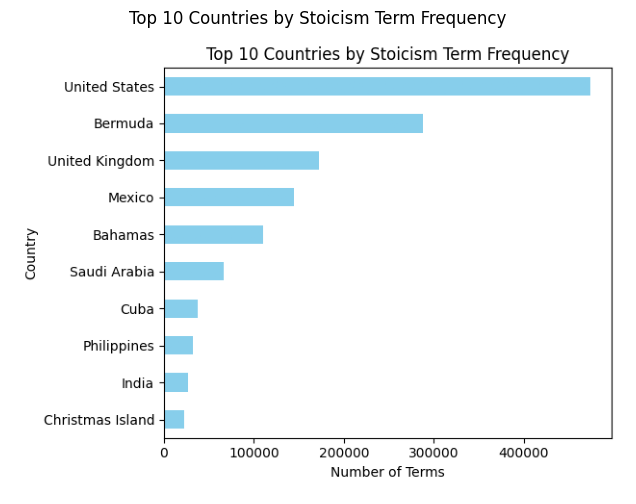

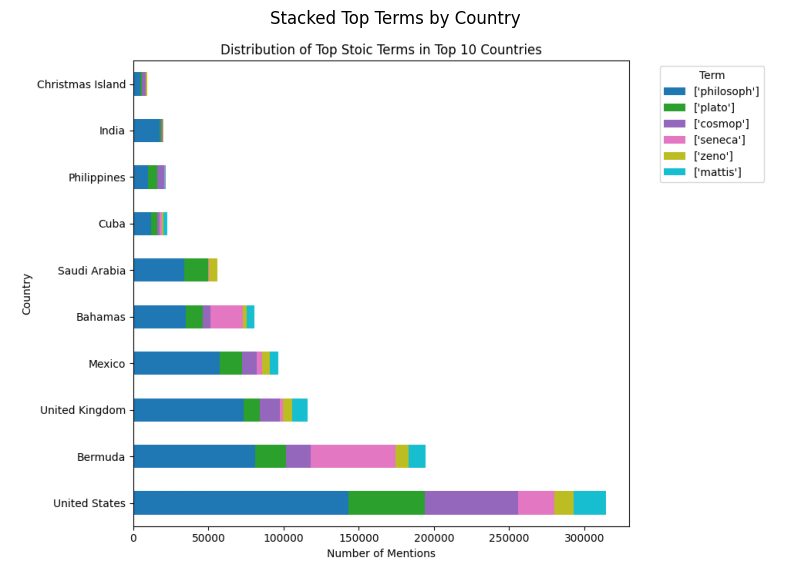

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# -------------------------------
# Caminhos dos arquivos de imagem
# -------------------------------
img1_path = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/top10_total_terms_by_country.png"
img2_path = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/stacked_top_terms_by_country.png"

# -------------------------------
# Exibir imagem 1 — Top 10 países
# -------------------------------
img1 = mpimg.imread(img1_path)
plt.figure(figsize=(12, 6))
plt.imshow(img1)
plt.axis('off')
plt.title("Top 10 Countries by Stoicism Term Frequency")
plt.show()

# -------------------------------
# Exibir imagem 2 — Termos empilhados
# -------------------------------
img2 = mpimg.imread(img2_path)
plt.figure(figsize=(12, 7))
plt.imshow(img2)
plt.axis('off')
plt.title("Stacked Top Terms by Country")
plt.show()

In [ ]:
##🔹 Block 8 — Semantic Clustering by Country

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# -------------------------------
# CONFIGURATION
# -------------------------------
DATA_PATH = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/term_frequency_by_country.csv"
PLOT_PATH = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/semantic_clusters_countries.png"

# -------------------------------
# LOAD AND PREPARE DATA
# -------------------------------
df = pd.read_csv(DATA_PATH)
df = df.rename(columns={df.columns[0]: "country"})
df = df.set_index("country")
df_terms = df.drop(columns=["TOTAL_TERMS"])

# -------------------------------
# SCALE + PCA + CLUSTERING
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_terms)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# -------------------------------
# PLOT CLUSTERS
# -------------------------------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=80, edgecolors='k')

# Anotar países mais influentes
for i, country in enumerate(df_terms.index):
    if df["TOTAL_TERMS"].iloc[i] > 30000:
        plt.text(X_pca[i, 0], X_pca[i, 1], country, fontsize=9, ha='right', va='bottom')

plt.title("Semantic Clustering of Countries by Stoic Term Usage")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.savefig(PLOT_PATH)
plt.close()

print(f"✅ Block 8 complete — gráfico salvo em: {PLOT_PATH}")

/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


✅ Block 8 complete — gráfico salvo em: /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/semantic_clusters_countries.png


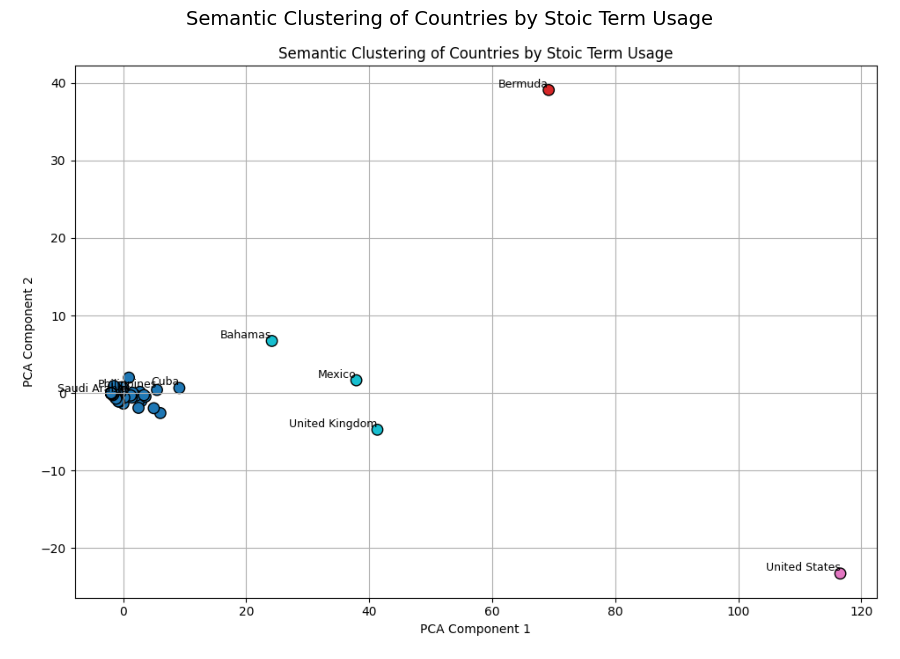

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho do gráfico salvo
img_path = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/plots/semantic_clusters_countries.png"

# Exibir imagem
img = mpimg.imread(img_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Semantic Clustering of Countries by Stoic Term Usage", fontsize=14)
plt.show()

In [ ]:
##🔹 Block 9 — Final Outputs and Export Package

In [ ]:
import os
import zipfile

# -------------------------------
# CONFIGURAÇÕES
# -------------------------------
BASE_DIR = "/n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/"
OUTPUT_ZIP = os.path.join(BASE_DIR, "stoicism_v3_outputs.zip")

# Arquivos e pastas a incluir
INCLUDE_FILES = [
    "term_frequency_by_year.csv",
    "term_frequency_by_country.csv",
    "stoicism_heatmap_global.html",
    "stoicism_heatmap_global_light.html",
    "plots/term_evolution.png",
    "plots/top10_total_terms_by_country.png",
    "plots/stacked_top_terms_by_country.png",
    "plots/semantic_clusters_countries.png"
]

# -------------------------------
# CRIAR ARQUIVO ZIP
# -------------------------------
with zipfile.ZipFile(OUTPUT_ZIP, "w", zipfile.ZIP_DEFLATED) as zipf:
    for rel_path in INCLUDE_FILES:
        full_path = os.path.join(BASE_DIR, rel_path)
        if os.path.exists(full_path):
            zipf.write(full_path, arcname=rel_path)

print(f"✅ Block 9 complete — outputs compactados em:\n→ {OUTPUT_ZIP}")

✅ Block 9 complete — outputs compactados em:
→ /n/netscratch/cga/Lab/rpalbuquerque/stoicism_v3/stoicism_v3_outputs.zip
